# projet mnist

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mninst = fetch_openml('mnist_784', version=1)

### 1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.

In [3]:
print(mninst.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### 2. En utilisant les clés du dictionnaire "mnist", affichez :
La taille des données (le nombre des features et la taille de chaque feature). Par convention, les données sont à stocker dans une variable "X".
La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"

In [4]:
print("Features: ", mninst.data.shape, "taille des features: ", len(mninst.data))

Features:  (70000, 784) taille des features:  70000


In [5]:
print("Target", mninst.target.shape)

Target (70000,)


In [6]:
X = mninst.data
y = mninst.target

#### Les différentes classes de la base de données

In [7]:
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


#### Une description détaillée de la base de données.

### A travers cette question, vous avez dû conclure que la base de données MNIST contient 
70 000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784
=28*28.

Affichez l’image de la première instance de la base de données.

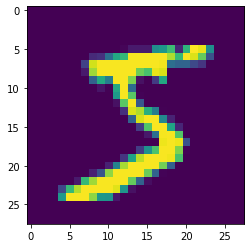

In [8]:

img = np.array((X[0]))
img = img.reshape(28,28)
plt.imshow(img)

#### Affichez la classe de la première instance

In [9]:
print(y[0])

5


### 4. Affichez le type des labels (du premier label par exemple)

### 5. A travers la question précédente, vous avez dû remarquer que le type des labels est
une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique,

d’utiliser des chiffres. Par conséquent, appliquez le casting sur les labels pour les transformer à des entiers.

In [10]:
y = y.astype(int)
print(y.dtype)

int32


## 1.3 Répartition des données
Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en
base d’apprentissage et en base de test. Les 60 000 premières images composeront la base
d’apprentissage et le reste des images constituera la base de test. Écrivez un code qui met en
exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de
test/d’apprentissage dans 4 variables.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14285, random_state=42)
print(len(X_train), len(X_test))

60000 10000


## 2 Apprentissage d’un classifieur binaire
Comme indiqué dans les objectifs, ce projet vise à classifier les chiffres. Une des solutions est
d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que
nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5
### 2.1 Apprentissage des données
1. En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables (une première pour la base d’apprentissage et une autre pour la base de test) distinctes

True si le classe de l’instance est 5 et False Sinon. De ce fait, nous traitons une classification
binaire.

In [12]:
y_five_test = np.zeros((y_test.shape))
y_five_test = np.where(y_test == 5, True, False)

y_five_train = np.zeros((y_train.shape))
y_five_train = np.where(y_train == 5, True, False)

print(y_five_train[0:20])
print(y_train[0:20])

[False False False False False False False False False False False False
 False False False False False False False False]
[2 4 0 1 6 6 9 0 3 4 4 3 1 4 7 1 6 9 3 0]


2. Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [13]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_five_train)
SGDClassifier(max_iter=5)
y_five_predict = clf.predict(X_train)
print(clf.score(X_test, y_five_test))
print(y_five_predict[20:40])
print(y_five_train[20:40])

0.9616
[False False False False  True False False False False  True False False
 False False  True False False False False False]
[False False False False False False False False False  True False False
 False False False False False False False False]


#### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méth-
ode de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

#### 2.2.1 Taux de classification
1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher :

• le taux de classification (accuracy) de chaque fold

• la moyenne des taux de classification

In [14]:
from sklearn.model_selection import cross_val_score
acc_folds = cross_val_score (clf,  X_train,  y_five_train,  cv=3, scoring= "accuracy")
print(acc_folds)
print(np.mean(acc_folds))

[0.9663  0.9639  0.96255]
0.9642500000000002


#### 2. Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de

MNIST comme "non-5". Créez une classe Never5Classifier qui hérite de la classe BaseEsti-
mator. la classe BaseEstimator existe dans le sous-module "base" du module "sklearn".

3. Dans la classe Never5Classifier, créez :
• Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va

rien retourner et par conséquent va contenir que le mot-clé "pass". Vous allez implé-
menter cette méthode car l’héritage de la classe BaseEstimator l’exige

• Une méthode predict qui prend en argument les données et retourne une structure de
données ayant la taille des données et qui contient que la valeur False (= non-5). Utilisez
la fonction "zeros" du module "numpy" avec un "dtype=bool"

In [15]:
from  sklearn . base  import  BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        y_never_five = np.zeros((y.shape))
        y_never_five = np.zeros((len(X),1), dtype=bool)
        return y_never_five


#### 4. Créez un objet de la classe Never5Classifier
#### 5. Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. Optez
pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification
(accuracy) de chaque fold; La moyenne des taux de classification.

In [16]:
never = Never5Classifier()
acc_never = cross_val_score (never,  X_train,  y_five_train,  cv=3, scoring= "accuracy")
print(acc_never)
print(np.mean(acc_never))

[0.9119  0.90875 0.91055]
0.9104000000000001


### 2.2.2 Matrice de confusion:
1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données
d’apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module
"model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold
cross validation.

In [17]:
from sklearn.model_selection import cross_val_predict
y_five_pred = cross_val_predict(never, X_train, y_five_train,  cv=3)
print(y_five_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


##### 2. Affichez la matrice de confusion du modèle d’apprentissage. Veillez à bien interpréter la
matrice de confusion.

In [18]:
# pour le SGD
from sklearn.metrics import confusion_matrix

matrx = confusion_matrix(y_five_train, y_five_predict)
print(matrx)

[[53158  1466]
 [  694  4682]]


In [19]:
# pour le never five
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_five_train, y_five_pred)
print(matrx)

[[54624     0]
 [ 5376     0]]


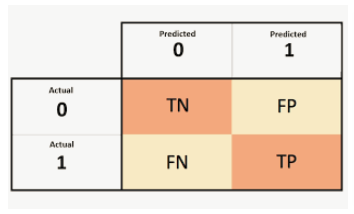
pour le never five, on trouve bien uniquement des true negative et des falses négatives (les cinq classés en False)
pour le SGD on peut voir les quelques faux négatifs et faux positifs.


### 2.2.3 Précision et rappel:
1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#print(precision_recall_fscore_support(y_five_train, y_five_predict))

print("precision", precision_score(y_five_train, y_five_predict))
print("recall", recall_score(y_five_train, y_five_predict))
print("f1", f1_score(y_five_train, y_five_predict))


precision 0.7615484710474951
recall 0.8709077380952381
f1 0.8125650815688996


#### 2. Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction de décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance sinon il affecte la classe négative. Affichez les scores des différentes instances de la base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_function" pour l’argument "method" et une validation croisée de type 3-fold cross-validation.

In [21]:
y_five_pred_df = cross_val_predict(clf, X_train, y_five_train, cv=3, method = "decision_function")

In [22]:
print(y_five_pred_df)

[-8929.78161872 -6808.36805334 -2667.882915   ... -5922.5148639
 -2949.90979911 -6966.7450938 ]


#### 3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_recall_curve"

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_five_train, y_five_pred_df)
print("precision : ", precision)
print("recall :", recall)
print("thresholds :", thresholds)

precision :  [0.08963137 0.08961619 0.08961769 ... 1.         1.         1.        ]
recall : [1.00000000e+00 9.99813988e-01 9.99813988e-01 ... 3.72023810e-04
 1.86011905e-04 0.00000000e+00]
thresholds : [-95391.23877997 -94925.13589267 -94888.30991612 ...  29193.1426085
  30428.51696109  33362.59061064]


#### 4. Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe des ordonnées doit contenir les précisions. Interprétez les résultats.

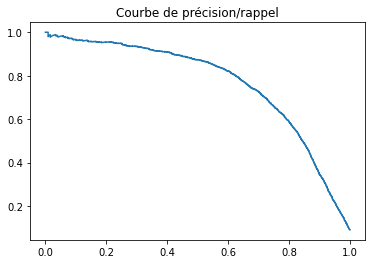

In [24]:
plt.plot(recall, precision)
plt.title("Courbe de précision/rappel")
plt.show()

Nous pouvons constater que la précision est inversement proportionnelle au rappel.

### 2.2.4 Courbe ROC:
#### 1. Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour

classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sous-
module "metrics" du module "sklearn"

In [25]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_five_train, y_five_pred_df, pos_label=1) #False Positive Rate #True Positive Rate
print(fpr)

[0.         0.         0.         ... 0.99961555 0.99961555 1.        ]


#### 2. Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe
des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et
activer le mode "grid" avec la fonction grid de matplotlib

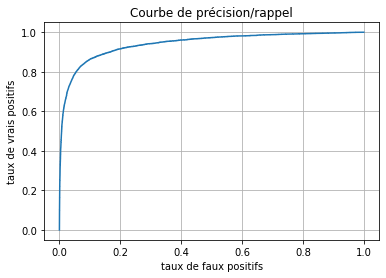

In [26]:
plt.plot(fpr, tpr)
plt.title("Courbe de précision/rappel")
plt.xlabel("taux de faux positifs")
plt.ylabel("taux de vrais positifs")
plt.grid(True)
plt.show()

#### 3. Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez
la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_five_train, y_five_pred_df)

0.9425024207700434

## 3 Apprentissage d’un classifieur multi-classes
Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST.
### 3.1 Apprentissage des données
#### 1. En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes
les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les
classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie
II de TP.

In [28]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = clf.predict(X_train)
print(clf.score(X_test, y_test))
print(y_pred[20:40])
print(y_train[20:40])

0.8774
[7 7 9 2 5 6 4 1 4 5 4 7 6 2 5 2 9 7 2 2]
[7 7 9 2 6 6 4 1 4 5 4 7 6 4 2 2 9 7 2 2]


#### 2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de
données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

In [29]:
example = X[0].reshape(1,784)
clf.predict(example)

array([5])

#### 3. En utilisant l’objet qui instancie la classe SGDClassifier :
• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.

In [30]:
clf.decision_function(example)

array([[-22246.25377642, -32398.50387103,  -8655.84341851,
         -3195.62598017, -25858.08756876,   1374.18950773,
        -34336.1995232 , -10763.60594657, -12280.71013588,
        -14070.67821831]])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est
ce que vous remarquez ?

In [31]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

On remarque que la valeur qui correspond à 5 est la seule positive.

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
#### 3.2.1 Taux de classification
###### 1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold;
la moyenne des taux de classification

In [32]:
from sklearn.model_selection import cross_val_score
accu_folds = cross_val_score (clf,  X_train,  y_train,  cv=3, scoring= "accuracy")
print(accu_folds)
print(np.mean(accu_folds))

[0.8849  0.85175 0.8833 ]
0.8733166666666667


##### 2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci

en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


##### 3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de
type 3-fold cross-validation. Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [34]:
accu_folds_scaled = cross_val_score (clf,  X_train_scaled,  y_train,  cv=3, scoring= "accuracy")
print(accu_folds_scaled)
print(np.mean(accu_folds_scaled))

[0.90775 0.9088  0.8976 ]
0.9047166666666667


#### 3.2.2 Matrice de Confusion
##### 1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données
d’apprentissage.

In [35]:
clf_scaled = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf_scaled.fit(X_train_scaled, y_train)
SGDClassifier(max_iter=5)
y_pred_scaled = clf_scaled.predict(X_train_scaled)
print(clf_scaled.score(X_test, y_test))
print(y_pred_scaled[20:40])
print(y_train[20:40])

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.822
[7 7 9 2 5 6 4 1 4 5 4 7 6 8 8 2 9 7 2 2]
[7 7 9 2 6 6 4 1 4 5 4 7 6 4 2 2 9 7 2 2]


##### 2. Affichez la matrice de confusion du modèle d’apprentissage. Pour ce faire, utilisez la fonc-
tion "confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la ma-
trice de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10

classes. Interprétez les résultats.

In [36]:
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_train, y_pred_scaled)
print(matrx)

[[5675    0    7   10    7   39   34    5  143    0]
 [   1 6454   42   15    5   39    7    8  142   12]
 [  24   23 5434   78   66   20   48   43  272   15]
 [  28   16  111 5379    1  195   23   39  255   60]
 [  10   16   47    7 5432    7   33   17  195  154]
 [  30   18   25  152   51 4618   78   19  323   62]
 [  26   15   50    1   33   87 5592    6  105    0]
 [  20   16   67   24   39   11    5 5766   98  192]
 [  17   66   46   84    3  111   27    9 5449   44]
 [  25   23   30   65  116   40    1  168  240 5214]]


In [37]:
import tensorflow as tf